### Imports

In [22]:
import os
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv, find_dotenv

### Conn

In [48]:
env_path = find_dotenv()
load_dotenv(env_path)

conn = pymysql.connect (
    host = os.getenv('HOST'),
    port = int(3306),
    user = os.getenv('USER_DB'),
    password = os.getenv('PASSWORD_DB'),
    db = os.getenv('DB'),
    charset = 'utf8mb4'
)

## Query 1: Ratio of users subscribed to account age

In [55]:
def get_ratio_subs_per_user(conn):
    df = pd.read_sql_query(
        
        """Returns number of times a users has had sub divided by account age, excludes users who have never had a sub"""
        """
            SELECT 
                Product, 
                Status, 
                userID,
                stripeCustID,
                COUNT(*) AS num_subs,
                DATEDIFF(NOW(), createDate) AS account_age
            FROM stripe_subscription
            JOIN user ON user.stripeCustID = stripe_subscription.`Customer ID`
            GROUP BY `Customer ID` 
            ORDER BY COUNT(*) DESC
        """, conn)
    
    return df

df_subs_per_user = get_ratio_subs_per_user(conn)

/Users/benquartermaine/.pyenv/versions/3.8.12/envs/customerclustering/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [56]:
df_subs_per_user

,Product,Status,userID,stripeCustID,num_subs,account_age
0,Ausmed Subscription,incomplete_expired,b844dd04-799b-4d74-aa89-e3d91e6b135b,cus_CwbLsaFBPovaL4,14,1535.0
1,Ausmed Subscription,incomplete_expired,6037d38d-d098-4f68-be8c-49b7131b8116,cus_CVloz8uJiXpqfF,10,1606.0
2,Ausmed Subscription,canceled,62d1fe96-34f6-4992-9f15-b240f07770d8,cus_EoCO9ITZcMHmkA,9,1226.0
3,Ausmed Subscription,incomplete_expired,d83f7491-9780-4568-a1c1-fd4c82434a06,cus_JIgpIXgpkkotwL,8,482.0
4,Ausmed Subscription,incomplete_expired,cfe4c603-9844-4549-9e37-37786e45a762,cus_Cvl36O6MtngQRg,7,1537.0
...,...,...,...,...,...,...
29111,Ausmed Subscription,active,fff5b6ec-0f17-4c0f-acdb-caf5a54d440c,cus_AlI7ExGfEYx9BI,1,1975.0
29112,Ausmed Subscription,active,fff61169-6743-4b75-b100-3603d1c02082,cus_HBQubDAIn90yiH,1,833.0
29113,Ausmed Subscription,active,fff6edf1-916e-496e-b811-ec8a60b4dc3f,cus_Htf9RoTV17oNz6,1,715.0
29114,Ausmed Subscription,canceled,fff8d7d8-d0a5-4fb1-9e1f-a6063f16c28d,cus_IjezQrGVvBmqui,1,576.0


In [57]:
df_subs_per_user['subs_to_age_ratio'] = round(df_subs_per_user["account_age"] / df_subs_per_user["num_subs"],0)

[Text(0.5, 1.0, 'Ratio of times a subscriber subscribed divided by their account age in days')]

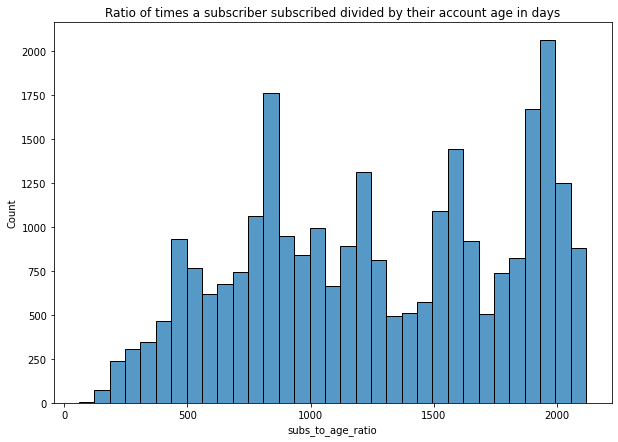

In [58]:
plt.figure(figsize=(10, 7))
sns.histplot(df_subs_per_user['subs_to_age_ratio']).set(title = "Ratio of times a subscriber subscribed divided by their account age in days")


## Query 2: Minutes documented per user (total)

In [60]:
def get_total_mins_doc(conn):
    df_doc = pd.read_sql_query(
        """
        SELECT
            owner,
            SUM(min) AS total_mins_doc,
            COUNT(*) AS total_docs
        FROM activity_20220808
        GROUP BY owner
        """, conn)
    
    df_doc['mins_per_documentation'] = round(df_doc['total_mins'] / df_doc['total_docs'], 0)
    
    return df_doc

df_doc = get_total_mins_doc(conn)

/Users/benquartermaine/.pyenv/versions/3.8.12/envs/customerclustering/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [64]:
df_doc['mins_per_documentation'] = round(df_doc['total_mins'] / df_doc['total_docs'], 0)

In [65]:
df_doc

,owner,total_mins,total_docs,mins_per_documentation
0,00001d9c-5de5-4ed2-9ecc-98341286765a,110.0,7,16.0
1,00001fb9-98c7-4dd4-b922-40a4094cd0d8,611.0,8,76.0
2,0000c854-c7a3-4047-9a54-2e1a3464621f,235.0,17,14.0
3,00013cfc-f97f-428d-bf6b-558601512bd7,5760.0,16,360.0
4,000161bd-3737-49f4-9733-b1fd7577647c,720.0,1,720.0
...,...,...,...,...
254122,ffff1bc4-d54f-4c43-926c-0146f22dd26f,2164.0,13,166.0
254123,ffff531f-a530-49e8-8667-88490d19845b,120.0,1,120.0
254124,ffff5a90-d347-47d3-ac12-3bec59c19512,280.0,7,40.0
254125,ffffca0f-a10f-466e-8179-f91c11035d15,105.0,2,52.0
